# Import Libaries

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Read Image

In [67]:
def read_image():
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/font.png"
    img = cv.imread(path,0)
    th,binary = cv.threshold(img,127,255,cv.THRESH_BINARY)
    binary = binary * 255
    
    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/noise.jpg"
    img = cv.imread(path,0)
    th,noise1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    

    path = "/media/rifat/STUDY/4-1/LAB/Image_Processing/image/noise3.png"
    img = cv.imread(path,0)
    th,noise2 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    
    
    
    return binary,noise1,noise2

# Morphological_processing

In [68]:
def morphological_change(binary,noise1,noise2, kernel):
    img_erosion = cv.erode(binary, kernel, iterations=1)
    img_dilation = cv.dilate(binary, kernel, iterations=1)
    
    opening = cv.morphologyEx(noise1, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(noise2, cv.MORPH_CLOSE, kernel)

    plt.figure(figsize=(10,6))
    
    plt.subplot(1,3,1)
    plt.imshow(binary,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,3,2)
    plt.imshow(img_erosion,cmap = 'gray')
    plt.title("erosion")
    
    plt.subplot(1,3,3)
    plt.imshow(img_dilation,cmap = 'gray')
    plt.title("dilation")
    
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(noise1,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,4,2)
    plt.imshow(opening,cmap = 'gray')
    plt.title("Opening")
    
    plt.subplot(1,4,3)
    plt.imshow(noise2,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,4,4)
    plt.imshow(closing,cmap = 'gray')
    plt.title("Closing")
    
    plt.show()
    

In [88]:
def erosion(img,kernel):
    #print(kernel.shape)
    r,c = img.shape
    tmp = np.ones((r+1,c+1),dtype = np.uint8)
    #print(tmp.shape)
    for i in range (1,r):
        for j in range (1,c):
            if img[i][j] == 0:
                tmp[i-1:i+2, j-1:j+2] = np.zeros(kernel.shape)
    return tmp
            


In [101]:
def dialation(img,kernel):
    if(img.max() == 1):
        img = img*255
    r,c = img.shape
    tmp = np.zeros((r,c),dtype = np.uint8)
    #print(tmp.shape)
    for i in range (1,r-1):
        for j in range (1,c-1):
            if img[i][j] == 255:
                tmp[i-1:i+2, j-1:j+2] = kernel
    return tmp
            


In [106]:
def morphological_change_manual(binary,noise1,noise2, kernel):
    
    erosion1 = erosion(binary,kernel)
    
    dialation1 = dialation(binary,kernel)
    
    opening = erosion(noise1,kernel)
    opening = dialation(opening,kernel)
    
    closing = dialation(noise2,kernel)
    closing = dialation(closing,kernel)
    closing = erosion(closing,kernel)
    
    plt.figure(figsize=(10,6))
    
    plt.subplot(1,3,1)
    plt.imshow(binary,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,3,2)
    plt.imshow(erosion1,cmap = 'gray')
    plt.title("erosion Manula")
    
    plt.subplot(1,3,3)
    plt.imshow(dialation1,cmap = 'gray')
    plt.title("dilation Manula")
    
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(noise1,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,4,2)
    plt.imshow(opening,cmap = 'gray')
    plt.title("Opening Manula")
    
    plt.subplot(1,4,3)
    plt.imshow(noise2,cmap = 'gray')
    plt.title("Original")
    
    plt.subplot(1,4,4)
    plt.imshow(closing,cmap = 'gray')
    plt.title("Closing Manula")
    
    plt.show()
    
    
    

# Main

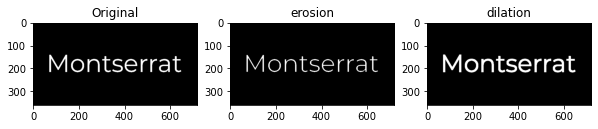

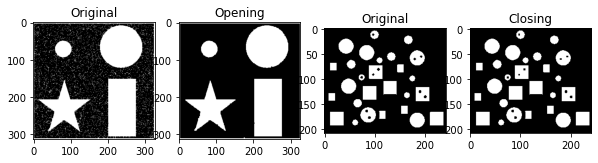

Manual change


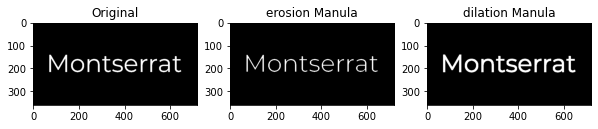

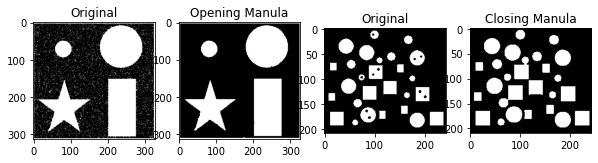

In [108]:
if __name__ == "__main__":
    binary,noise1,noise2 = read_image()
    
    
    kernel = np.ones((3, 3), np.uint8)
    morphological_change(binary,noise1,noise2,kernel)
    
    print("Manual change")
    morphological_change_manual(binary,noise1,noise2,kernel)

    
    
